## MF02_carbon balance_box_extract_for_PI9


In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.patches import Rectangle
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
import arrow
import glob
import sys
sys.path.append('../pyscripts/bylayer_extract/')
import extract_bylayer_mean_BOXMASK as ebmBOX 
import extract_bylayer_mean as ebm
from importlib import reload
from salishsea_tools import viz_tools

%matplotlib inline
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 13,
                     'xtick.labelsize' : 13,
                     'ytick.labelsize' : 13})

### [A] Map definition and station definition

Text(0.5, 1.0, 'individual stations')

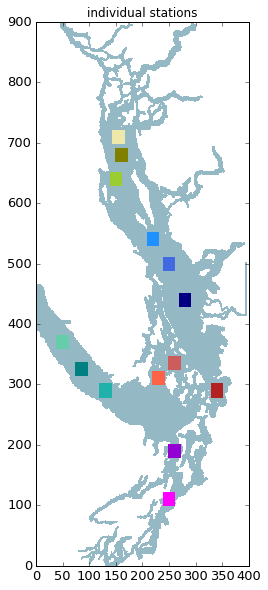

In [5]:
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'

ps_x = 250; ps_y = 110; ps_col = 'magenta'
ps2_x = 260; ps2_y = 190; ps2_col = 'darkviolet'
# ps2_x = 
w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax0.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax0.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax0.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax0.add_patch(rect_ns)

rect_ps = Rectangle((ps_x-10,ps_y-10),20,20,linewidth=2,edgecolor=ps_col,facecolor=ps_col)
ax0.add_patch(rect_ps)
rect_ps = Rectangle((ps2_x-10,ps2_y-10),20,20,linewidth=2,edgecolor=ps2_col,facecolor=ps2_col)
ax0.add_patch(rect_ps)


ax0.set_title('individual stations')




reload(ebmBOX)

    # reload(ebmBOX)

    # #(start, end, ftype, sdir, varname, fname, y, x)
    # pkldir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
    # start = '2015-01-01' #start of timeperiod
    # end = '2015-12-31' #end of timeperiod (typically a year)
    # ftype = 'carp' #type of model result .nc 
    # sdir = 'MAIN/BR_3rd_2015' #where under directory tree do we find ncs 
    # varname = 'dissolved_inorganic_carbon' #name of variable
    # fname = pkldir + 'BR3_DIC_means_cs2_BOX'
    # y = cs2_y; x = cs2_x
    # ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

run for PI4, BR3 for the above 12 stations, usage case above


In [6]:
# reload(ebmBOX)

# #(start, end, ftype, sdir, varname, fname, y, x)
# pkldir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = 'PI8/' #where under directory tree do we find nps 
# varname = 'dissolved_inorganic_carbon' #name of variable


# fname = pkldir + 'PI8_DIC_means_ps2_BOX'
# y = ps2_y; x = ps2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI8_DIC_means_ps_BOX'
# y = ps_y; x = ps_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

In [7]:
# reload(ebmBOX)

# #(start, end, ftype, sdir, varname, fname, y, x)
# pkldir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = 'MAIN/BR_3rd_2015/' #where under directory tree do we find nps 
# varname = 'dissolved_inorganic_carbon' #name of variable


# fname = pkldir + 'BR3_DIC_means_ps2_BOX'
# y = ps2_y; x = ps2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'BR3_DIC_means_ps_BOX'
# y = ps_y; x = ps_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

In [8]:
# reload(ebmBOX)

# #(start, end, ftype, sdir, varname, fname, y, x)
# pkldir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = 'PI9/' #where under directory tree do we find ncs 
# varname = 'dissolved_inorganic_carbon' #name of variable


# fname = pkldir + 'PI9_DIC_means_cs2_BOX'
# y = cs2_y; x = cs2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_cs_BOX'
# y = cs_y; x = cs_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_cs3_BOX'
# y = cs3_y; x = cs3_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_haro2_BOX'
# y = haro2_y; x = haro2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_haro_BOX'
# y = haro_y; x = haro_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_haro3_BOX'
# y = haro3_y; x = haro3_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_jdf2_BOX'
# y = jdf2_y; x = jdf2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_jdf_BOX'
# y = jdf_y; x = jdf_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_jdf3_BOX'
# y = jdf3_y; x = jdf3_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_ns2_BOX'
# y = ns2_y; x = ns2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_ns_BOX'
# y = ns_y; x = ns_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_ns3_BOX'
# y = ns3_y; x = ns3_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

# #constant
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# inletmask = False #are we masking out Toba/Bute/Jervis?
# sdir = '/PI9' #where under directory tree do we find ncs 

# #changes
# shortdesc = 'PI9_DIC'
# ftype = 'carp' #type of model result .nc 
# varname = 'dissolved_inorganic_carbon' #name of variable
# fname = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/' +shortdesc + '_means_inletsIN' #name of resulting pkl 
# ebm.extractor(start, end, ftype, sdir, varname, fname,  inletmask)


In [9]:
# reload(ebmBOX)

# ps_x = 250; ps_y = 110; ps_col = 'magenta'
# ps2_x = 260; ps2_y = 190; ps2_col = 'darkviolet'

# pkldir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = 'PI9/' #where under directory tree do we find nps 
# varname = 'dissolved_inorganic_carbon' #name of variable


# fname = pkldir + 'PI9_DIC_means_ps2_BOX'
# y = ps2_y; x = ps2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'PI9_DIC_means_ps_BOX'
# y = ps_y; x = ps_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )


# pkldir = '/ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = 'MAIN/BR_3rd_2015/' #where under directory tree do we find nps 
# varname = 'dissolved_inorganic_carbon' #name of variable


# fname = pkldir + 'BR3_DIC_means_ps2_BOX'
# y = ps2_y; x = ps2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )
# fname = pkldir + 'BR3_DIC_means_ps_BOX'
# y = ps_y; x = ps_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )


In [10]:
# #(start, end, ftype, sdir, varname, http://localhost:8801/notebooks/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/KEY_REBOOT/MF02_carbonbalance_bylayer-PI8.ipynb#fname, y, x)
# pkldir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# ftype = 'carp' #type of model result .nc 
# sdir = 'PI5/' #where under directory tree do we find ncs 
# varname = 'dissolved_inorganic_carbon' #name of variable
# fname = pkldir + 'PI5_DIC_means_inletsIN'
# y = cs2_y; x = cs2_x
# #ebm.extractor(start, end, ftype, sdir, varname, fname, y, x )

# ebm.extractor(start, end, ftype, sdir, varname, fname,  False)

#### LOAD PKLS OF ABOVE EXTRACTED QUANTITIES

In [11]:
#extract means for BR1-BR3, get fraser discharge
#var
BR1_var = pickle.load(open('../pkls/BR1_DIC_means_inletsIN.pkl' , 'rb')) 
BR2_var = pickle.load(open('../pkls/BR2_DIC_means_inletsIN.pkl' , 'rb')) 
BR3_var = pickle.load(open('../pkls/BR3_DIC_means_inletsIN.pkl' , 'rb')) 

PI1_var = pickle.load(open('../pkls/PI1_DIC_means_inletsIN.pkl' , 'rb')) 
PI2_var = pickle.load(open('../pkls/PI2_DIC_means_inletsIN.pkl' , 'rb')) 
PI3rr_var = pickle.load(open('../pkls/PI3rr_DIC_means_inletsIN.pkl' , 'rb')) 
PI4_var = pickle.load(open('../pkls/PI4_DIC_means_inletsIN.pkl' , 'rb')) 
PI4_var[PI4_var == 0] = np.nan
PI5_var = pickle.load(open('../pkls/PI5_DIC_means_inletsIN.pkl' , 'rb')) 
PI5_var[PI5_var == 0] = np.nan
Fraser_discharge = pickle.load(open('../pkls/Fraser_2015_year_runoff_m3_s.pkl', 'rb'))  



mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
depth = mesh['gdept_1d'][:]
days_in = np.arange(1,366,1)
#make a long 3-year dataset to be able to compare spinup progress for BR run


In [12]:
BR3_var = pickle.load(open('../pkls/BR3_DIC_means_inletsIN.pkl' , 'rb')) 
print(np.shape(BR3_var))
#print(BR3_var[0,:])

# import seawater
# dens = seawater.dens(tSAL,tTEMP,tPRES)
# tDIC=tDIC*dens/1000
# tALK=tALK*dens/1000

(40, 365)


#### load all DIC and salinity data

In [13]:
BR3_var_jdf = pickle.load(open('../pkls/BR3_DIC_means_jdf_BOX.pkl','rb'))
PI5_var_jdf = pickle.load(open('../pkls/PI5_DIC_means_jdf_BOX.pkl','rb'))
BR3_var_cs = pickle.load(open('../pkls/BR3_DIC_means_cs_BOX.pkl','rb'))
PI5_var_cs = pickle.load(open('../pkls/PI5_DIC_means_cs_BOX.pkl','rb'))
BR3_var_ns = pickle.load(open('../pkls/BR3_DIC_means_ns_BOX.pkl','rb'))
PI5_var_ns = pickle.load(open('../pkls/PI5_DIC_means_ns_BOX.pkl','rb'))
BR3_var_haro = pickle.load(open('../pkls/BR3_DIC_means_haro_BOX.pkl','rb'))
PI5_var_haro = pickle.load(open('../pkls/PI5_DIC_means_haro_BOX.pkl','rb'))

BR3_var_jdf2 = pickle.load(open('../pkls/BR3_DIC_means_jdf2_BOX.pkl','rb'))
PI5_var_jdf2 = pickle.load(open('../pkls/PI5_DIC_means_jdf2_BOX.pkl','rb'))
BR3_var_cs2 = pickle.load(open('../pkls/BR3_DIC_means_cs2_BOX.pkl','rb'))
PI5_var_cs2 = pickle.load(open('../pkls/PI5_DIC_means_cs2_BOX.pkl','rb'))
BR3_var_ns2 = pickle.load(open('../pkls/BR3_DIC_means_ns2_BOX.pkl','rb'))
PI5_var_ns2 = pickle.load(open('../pkls/PI5_DIC_means_ns2_BOX.pkl','rb'))
BR3_var_haro2 = pickle.load(open('../pkls/BR3_DIC_means_haro2_BOX.pkl','rb'))
PI5_var_haro2 = pickle.load(open('../pkls/PI5_DIC_means_haro2_BOX.pkl','rb'))

BR3_var_jdf3 = pickle.load(open('../pkls/BR3_DIC_means_jdf3_BOX.pkl','rb'))
PI5_var_jdf3 = pickle.load(open('../pkls/PI5_DIC_means_jdf3_BOX.pkl','rb'))
BR3_var_cs3 = pickle.load(open('../pkls/BR3_DIC_means_cs3_BOX.pkl','rb'))
PI5_var_cs3 = pickle.load(open('../pkls/PI5_DIC_means_cs3_BOX.pkl','rb'))
BR3_var_ns3 = pickle.load(open('../pkls/BR3_DIC_means_ns3_BOX.pkl','rb'))
PI5_var_ns3 = pickle.load(open('../pkls/PI5_DIC_means_ns3_BOX.pkl','rb'))
BR3_var_haro3 = pickle.load(open('../pkls/BR3_DIC_means_haro3_BOX.pkl','rb'))
PI5_var_haro3 = pickle.load(open('../pkls/PI5_DIC_means_haro3_BOX.pkl','rb'))

# BR3_sal_jdf = pickle.load(open('../pkls/BR3_sal_means_jdf_BOX.pkl','rb'))
# PI5_sal_jdf = pickle.load(open('../pkls/PI5_sal_means_jdf_BOX.pkl','rb'))
# BR3_sal_cs = pickle.load(open('../pkls/BR3_sal_means_cs_BOX.pkl','rb'))
# PI5_sal_cs = pickle.load(open('../pkls/PI5_sal_means_cs_BOX.pkl','rb'))
# BR3_sal_ns = pickle.load(open('../pkls/BR3_sal_means_ns_BOX.pkl','rb'))
# PI5_sal_ns = pickle.load(open('../pkls/PI5_sal_means_ns_BOX.pkl','rb'))
# BR3_sal_haro = pickle.load(open('../pkls/BR3_sal_means_haro_BOX.pkl','rb'))
# PI5_sal_haro = pickle.load(open('../pkls/PI5_sal_means_haro_BOX.pkl','rb'))

# BR3_sal_jdf2 = pickle.load(open('../pkls/BR3_sal_means_jdf2_BOX.pkl','rb'))
# PI5_sal_jdf2 = pickle.load(open('../pkls/PI5_sal_means_jdf2_BOX.pkl','rb'))
# BR3_sal_cs2 = pickle.load(open('../pkls/BR3_sal_means_cs2_BOX.pkl','rb'))
# PI5_sal_cs2 = pickle.load(open('../pkls/PI5_sal_means_cs2_BOX.pkl','rb'))
# BR3_sal_ns2 = pickle.load(open('../pkls/BR3_sal_means_ns2_BOX.pkl','rb'))
# PI5_sal_ns2 = pickle.load(open('../pkls/PI5_sal_means_ns2_BOX.pkl','rb'))
# BR3_sal_haro2 = pickle.load(open('../pkls/BR3_sal_means_haro2_BOX.pkl','rb'))
# PI5_sal_haro2 = pickle.load(open('../pkls/PI5_sal_means_haro2_BOX.pkl','rb'))

# BR3_sal_jdf3 = pickle.load(open('../pkls/BR3_sal_means_jdf3_BOX.pkl','rb'))
# PI5_sal_jdf3 = pickle.load(open('../pkls/PI5_sal_means_jdf3_BOX.pkl','rb'))
# BR3_sal_cs3 = pickle.load(open('../pkls/BR3_sal_means_cs3_BOX.pkl','rb'))
# PI5_sal_cs3 = pickle.load(open('../pkls/PI5_sal_means_cs3_BOX.pkl','rb'))
# BR3_sal_ns3 = pickle.load(open('../pkls/BR3_sal_means_ns3_BOX.pkl','rb'))
# PI5_sal_ns3 = pickle.load(open('../pkls/PI5_sal_means_ns3_BOX.pkl','rb'))
# BR3_sal_haro3 = pickle.load(open('../pkls/BR3_sal_means_haro3_BOX.pkl','rb'))
# PI5_sal_haro3 = pickle.load(open('../pkls/PI5_sal_means_haro3_BOX.pkl','rb'))

#### CALCULATE DEPTH-INTEGRATED BIOLOGY

In [14]:
flag ='../pkls/BR3_flagellates_means_inletsIN.pkl'
diat ='../pkls/BR3_diatoms_means_inletsIN.pkl'
cili ='../pkls/BR3_ciliates_means_inletsIN.pkl'
csd = '../pkls/cellsize_alg2.pkl'

flag_mas = pickle.load(open(flag, 'rb'))  
diat_mas = pickle.load(open(diat, 'rb'))
cili_mas = pickle.load(open(cili, 'rb'))

mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (mmask['e3t_1d'][:])

mask_broad = np.zeros([40,365])

for i in range(0,365):
    mask_broad[:,i] = depths


flag_mas_mm_m2 = np.nansum((mask_broad*flag_mas),axis = 0)
diat_mas_mm_m2 = np.nansum((mask_broad*diat_mas),axis = 0)
cili_mas_mm_m2 = np.nansum((mask_broad*cili_mas),axis = 0)

### [B] nice plot - PI5

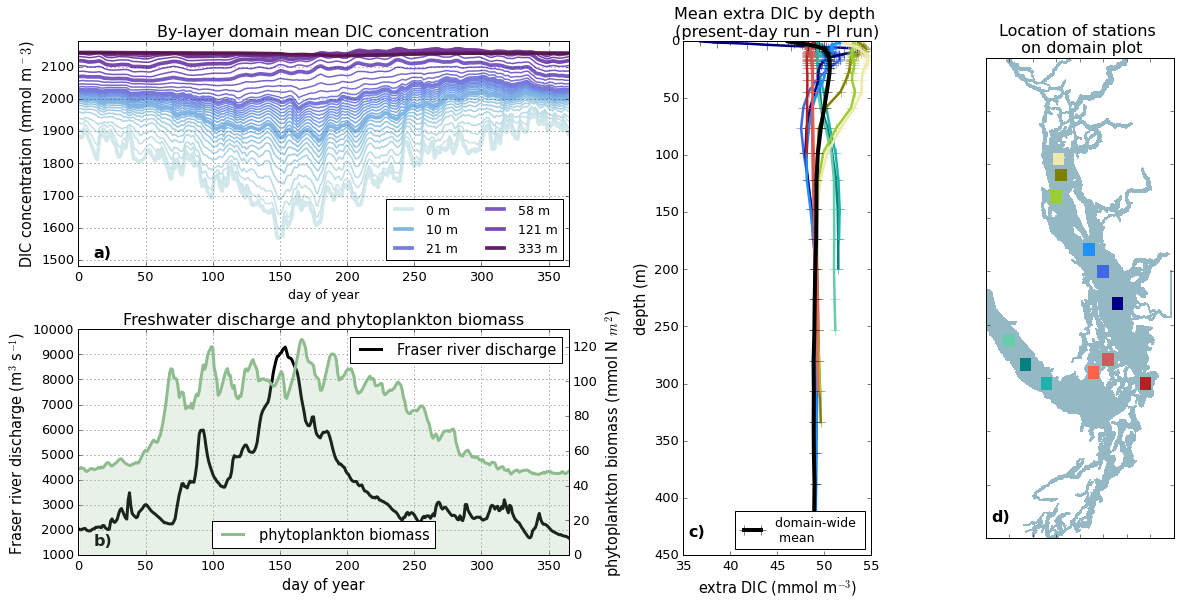

In [15]:
ts = 16 # title font
fs = 14.5 # all other font sizes
fact = 1
lw = 1.5
fig = plt.figure(figsize=(16.5*fact, 8.5*fact))
seg = 45
shift = 2
depth = mesh['e3t_0'][0,:,250,250]
ax1 = plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=1)
tcm = cm.dense

depths = mesh['gdept_1d'][:]
zdepths = depths[0]
for i in range(0,40):
#     zdepth = np.sum(depth[0:i])
    zdepth = zdepths[i]
    #print('i is '+ str(i) + ', depth is '+str(zdepth))

    ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
        | (i == 27) | (i == 35 ) ) :
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = str(int(zdepth))+' m', linewidth = lw+2.2)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'lower right', fontsize = fs-2, ncol = 2)
plt.xlim([0,365*1])
plt.ylim([1480,2180])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration', fontsize = ts)


ax2 = plt.subplot2grid((2,4), (1,0), colspan=2, rowspan=1)
ax2b =ax2.twinx()
ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 3, label = 'Fraser river discharge')
ax2.grid()
ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
          color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 3)
ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
                 color = 'darkseagreen', alpha = 0.2 )

ax2b.legend(loc = 'lower center', fontsize = fs)
ax2.legend(loc = 'upper right', fontsize = fs)
ax2b.set_ylabel('phytoplankton biomass (mmol N $m^2$)', fontsize = fs)
ax2.set_xlabel('day of year', fontsize = fs)
ax2.set_ylabel('Fraser river discharge (m$^3$ s$^{-1}$)', fontsize = fs)
ax2.set_title('Freshwater discharge and phytoplankton biomass', fontsize = ts)
plt.xlim([0,365])
ax2b.set_ylim([0,130])
ax2.text(0.03, 0.03, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax3 = plt.subplot2grid((2,4), (0,2), colspan=1, rowspan=2)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
tcm = cm.deep
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')


BR3_dp = np.nanmean(BR3_var, axis =1)
PI5_dp = np.nanmean(PI5_var, axis =1)

BR3_jdf_dp = np.nanmean(BR3_var_jdf, axis =1)
PI5_jdf_dp = np.nanmean(PI5_var_jdf, axis =1)
BR3_cs_dp = np.nanmean(BR3_var_cs, axis =1)
PI5_cs_dp = np.nanmean(PI5_var_cs, axis =1)
BR3_ns_dp = np.nanmean(BR3_var_ns, axis =1)
PI5_ns_dp = np.nanmean(PI5_var_ns, axis =1)
BR3_haro_dp = np.nanmean(BR3_var_haro, axis =1)
PI5_haro_dp = np.nanmean(PI5_var_haro, axis =1)

BR3_jdf2_dp = np.nanmean(BR3_var_jdf2, axis =1)
PI5_jdf2_dp = np.nanmean(PI5_var_jdf2, axis =1)
BR3_cs2_dp = np.nanmean(BR3_var_cs2, axis =1)
PI5_cs2_dp = np.nanmean(PI5_var_cs2, axis =1)
BR3_ns2_dp = np.nanmean(BR3_var_ns2, axis =1)
PI5_ns2_dp = np.nanmean(PI5_var_ns2, axis =1)
BR3_haro2_dp = np.nanmean(BR3_var_haro2, axis =1)
PI5_haro2_dp = np.nanmean(PI5_var_haro2, axis =1)

BR3_jdf3_dp = np.nanmean(BR3_var_jdf3, axis =1)
PI5_jdf3_dp = np.nanmean(PI5_var_jdf3, axis =1)
BR3_cs3_dp = np.nanmean(BR3_var_cs3, axis =1)
PI5_cs3_dp = np.nanmean(PI5_var_cs3, axis =1)
BR3_ns3_dp = np.nanmean(BR3_var_ns3, axis =1)
PI5_ns3_dp = np.nanmean(PI5_var_ns3, axis =1)
BR3_haro3_dp = np.nanmean(BR3_var_haro3, axis =1)
PI5_haro3_dp = np.nanmean(PI5_var_haro3, axis =1)

depths = mesh['gdept_1d'][:]
zdepth = depths[0]   

ax3.plot(BR3_jdf_dp-PI5_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf2_dp-PI5_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf3_dp-PI5_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(BR3_cs_dp-PI5_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs2_dp-PI5_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs3_dp-PI5_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(BR3_ns_dp-PI5_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns2_dp-PI5_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns3_dp-PI5_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(BR3_haro_dp-PI5_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro2_dp-PI5_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro3_dp-PI5_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BR3_dp-PI5_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')


ax3.set_title('Mean extra DIC by depth \n (present-day run - PI run) ', fontsize = ts)
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax4 = plt.subplot2grid((2,4), (0,3), colspan=1, rowspan=2)
im = ax4.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax4)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax4.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax4.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax4.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax4.add_patch(rect_ns)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.set_title('Location of stations \n on domain plot', fontsize = ts)

ax4.text(0.03, 0.03, 'd)', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='bottom')


fig.tight_layout()
plt.savefig('Fig2.png')





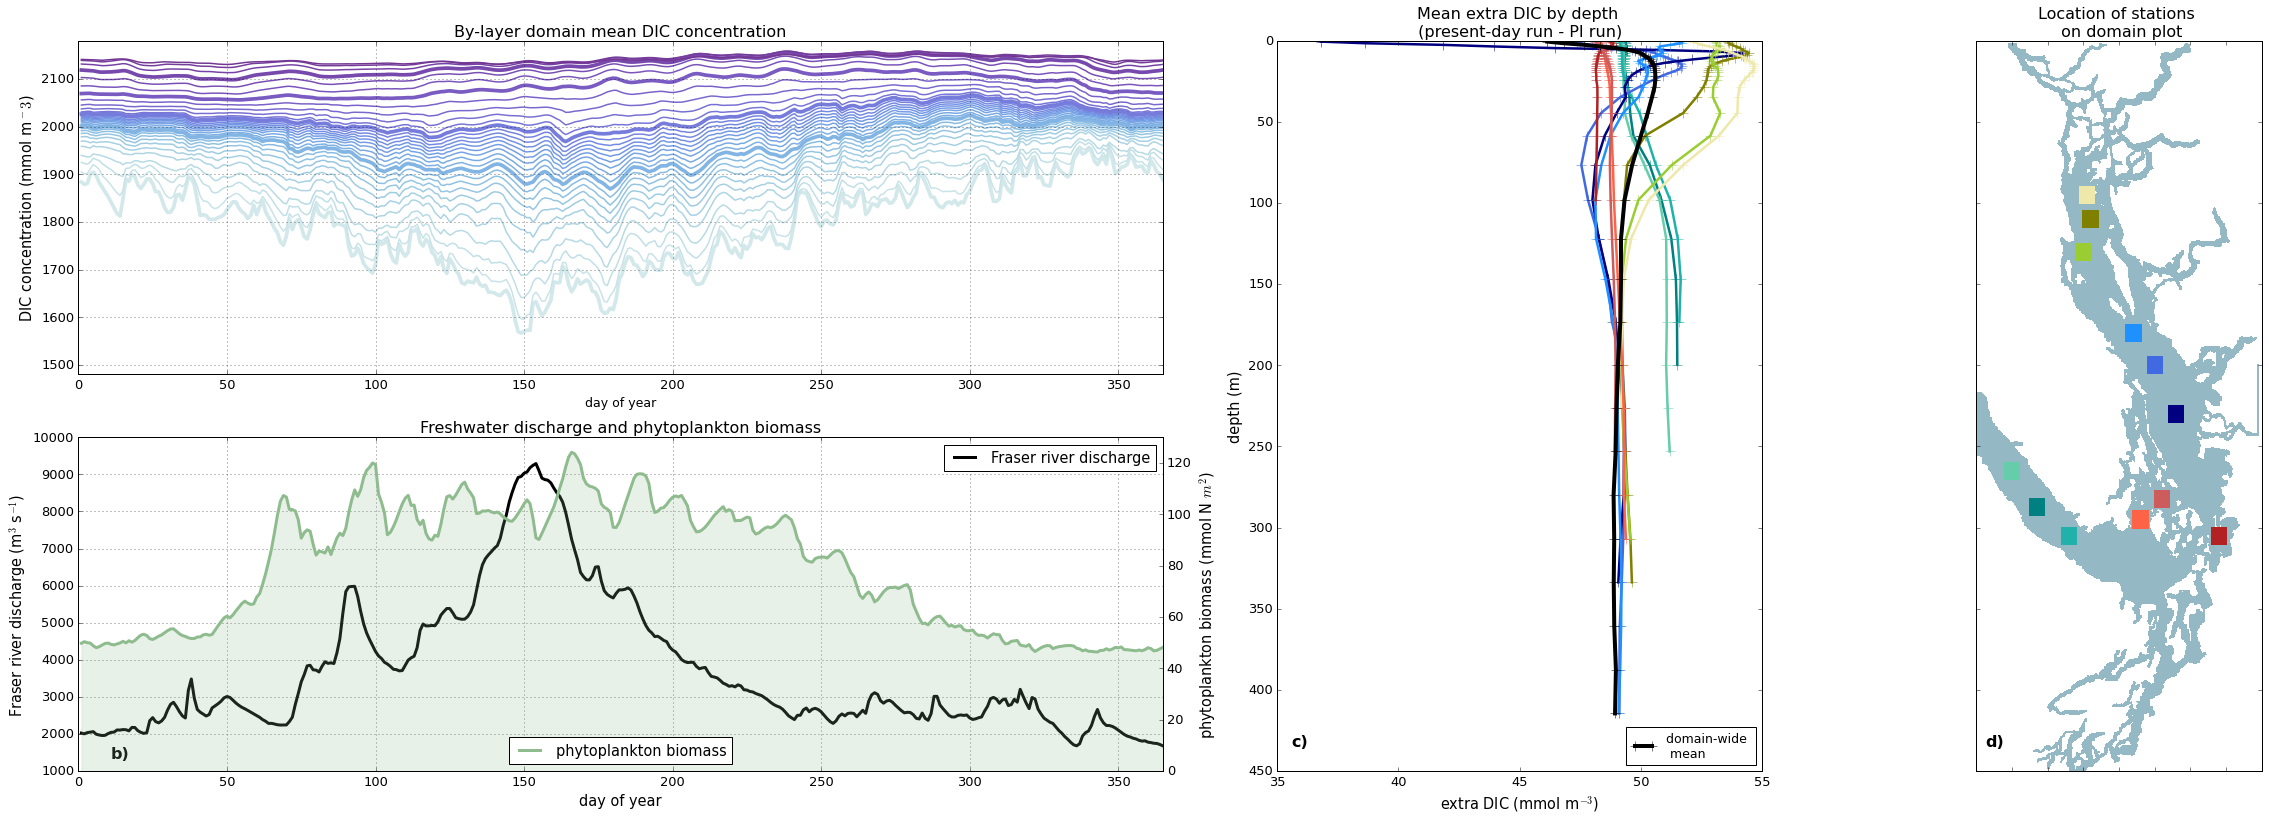

In [26]:
ts = 16 # title font
fs = 14.5 # all other font sizes
fact = 2
lw = 1.5
fig = plt.figure(figsize=(16.5*fact, 5.75*fact))
seg = 45
shift = 2
depth = mesh['e3t_0'][0,:,250,250]
ax1 = plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=1)
tcm = cm.dense

depths = mesh['gdept_1d'][:]
zdepths = depths[0]
for i in range(0,31):
#     zdepth = np.sum(depth[0:i])
    zdepth = zdepths[i]
    #print('i is '+ str(i) + ', depth is '+str(zdepth))

    ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
        | (i == 27) | (i == 35 ) ) :
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = str(int(zdepth))+' m', linewidth = lw+2.2)
#ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
#ax1.legend(loc = 'lower right', fontsize = fs-2, ncol = 2)
plt.xlim([0,365*1])
plt.ylim([1480,2180])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration', fontsize = ts)


ax2 = plt.subplot2grid((2,4), (1,0), colspan=2, rowspan=1)
ax2b =ax2.twinx()
ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 3, label = 'Fraser river discharge')
ax2.grid()
ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
          color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 3)
ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
                 color = 'darkseagreen', alpha = 0.2 )

ax2b.legend(loc = 'lower center', fontsize = fs)
ax2.legend(loc = 'upper right', fontsize = fs)
ax2b.set_ylabel('phytoplankton biomass (mmol N $m^2$)', fontsize = fs)
ax2.set_xlabel('day of year', fontsize = fs)
ax2.set_ylabel('Fraser river discharge (m$^3$ s$^{-1}$)', fontsize = fs)
ax2.set_title('Freshwater discharge and phytoplankton biomass', fontsize = ts)
plt.xlim([0,365])
ax2b.set_ylim([0,130])
ax2.text(0.03, 0.03, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax3 = plt.subplot2grid((2,4), (0,2), colspan=1, rowspan=2)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
tcm = cm.deep
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')


BR3_dp = np.nanmean(BR3_var, axis =1)
PI5_dp = np.nanmean(PI5_var, axis =1)

BR3_jdf_dp = np.nanmean(BR3_var_jdf, axis =1)
PI5_jdf_dp = np.nanmean(PI5_var_jdf, axis =1)
BR3_cs_dp = np.nanmean(BR3_var_cs, axis =1)
PI5_cs_dp = np.nanmean(PI5_var_cs, axis =1)
BR3_ns_dp = np.nanmean(BR3_var_ns, axis =1)
PI5_ns_dp = np.nanmean(PI5_var_ns, axis =1)
BR3_haro_dp = np.nanmean(BR3_var_haro, axis =1)
PI5_haro_dp = np.nanmean(PI5_var_haro, axis =1)

BR3_jdf2_dp = np.nanmean(BR3_var_jdf2, axis =1)
PI5_jdf2_dp = np.nanmean(PI5_var_jdf2, axis =1)
BR3_cs2_dp = np.nanmean(BR3_var_cs2, axis =1)
PI5_cs2_dp = np.nanmean(PI5_var_cs2, axis =1)
BR3_ns2_dp = np.nanmean(BR3_var_ns2, axis =1)
PI5_ns2_dp = np.nanmean(PI5_var_ns2, axis =1)
BR3_haro2_dp = np.nanmean(BR3_var_haro2, axis =1)
PI5_haro2_dp = np.nanmean(PI5_var_haro2, axis =1)

BR3_jdf3_dp = np.nanmean(BR3_var_jdf3, axis =1)
PI5_jdf3_dp = np.nanmean(PI5_var_jdf3, axis =1)
BR3_cs3_dp = np.nanmean(BR3_var_cs3, axis =1)
PI5_cs3_dp = np.nanmean(PI5_var_cs3, axis =1)
BR3_ns3_dp = np.nanmean(BR3_var_ns3, axis =1)
PI5_ns3_dp = np.nanmean(PI5_var_ns3, axis =1)
BR3_haro3_dp = np.nanmean(BR3_var_haro3, axis =1)
PI5_haro3_dp = np.nanmean(PI5_var_haro3, axis =1)

depths = mesh['gdept_1d'][:]
zdepth = depths[0]   

ax3.plot(BR3_jdf_dp-PI5_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf2_dp-PI5_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf3_dp-PI5_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(BR3_cs_dp-PI5_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs2_dp-PI5_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs3_dp-PI5_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(BR3_ns_dp-PI5_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns2_dp-PI5_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns3_dp-PI5_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(BR3_haro_dp-PI5_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro2_dp-PI5_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro3_dp-PI5_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BR3_dp-PI5_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')


ax3.set_title('Mean extra DIC by depth \n (present-day run - PI run) ', fontsize = ts)
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax4 = plt.subplot2grid((2,4), (0,3), colspan=1, rowspan=2)
im = ax4.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax4)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax4.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax4.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax4.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax4.add_patch(rect_ns)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.set_title('Location of stations \n on domain plot', fontsize = ts)

ax4.text(0.03, 0.03, 'd)', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='bottom')


fig.tight_layout()
plt.savefig('Fig2.png')





## To calculate differences, convert each day's model output to umol/kg and then do the same thing as above


    
    BR3_dp = np.nanmean(BR3_var, axis =1)
    PI5_dp = np.nanmean(PI5_var, axis =1)

    1) get list of nc's for PI and BR
    2) open them, calculate pressure using gsw
    3) convert DIC 
    4) save in .pkls
    5) then use an adaptation of ebm.extractor to get yearly cycles
    6) do a dummy check that those yearly cycles look the way that you would expect
    7) average them to get depth profiles
    8) subtract them to see how close you are to 50 
    
    
    dummy check >umol/L * L/kg =  umol/kg > it will be a bit less. )a liter of seawater is always a bit more than a kilogram)


In [16]:
# step 1

sdir = 'BR_3rd_2015'
start = '2015-01-01'
end = '2015-12-31'

ncfile_grid_BR = []
ncfile_carp_BR = []
start_run = arrow.get(start)
end_run = arrow.get(end)
arrow_array = []
for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)
#no of days in array
dayslen = len(arrow_array)

for i in range(0,dayslen):
    tdate = arrow_array[i][0]
    ddmmmyy = tdate.format('DDMMMYY').lower()
    ymd = tdate.format('YYYYMMDD')
    ftype = 'grid_T'
    nc_ncfile = '/data/tjarniko/results/BASERUN_EXP/MAIN/' + sdir + '/ncs/SKOG_1d_*'+ ftype +'*' + ymd + '-' + ymd + '.nc'
    tnc_ncfile = glob.glob(nc_ncfile)
    ncfile_grid_BR.append(tnc_ncfile[0])
    ftype = 'carp_T'
    nc_ncfile = '/data/tjarniko/results/BASERUN_EXP/MAIN/' + sdir + '/ncs/SKOG_1d_*'+ ftype +'*' + ymd + '-' + ymd + '.nc'
    tnc_ncfile = glob.glob(nc_ncfile)
    ncfile_carp_BR.append(tnc_ncfile[0])    

sdir = 'PI5'
ncfile_grid_PI = []
ncfile_carp_PI = []

for i in range(0,dayslen):
    tdate = arrow_array[i][0]
    ddmmmyy = tdate.format('DDMMMYY').lower()
    ymd = tdate.format('YYYYMMDD')
    ftype = 'grid_T'
    nc_ncfile = '/data/tjarniko/results/BASERUN_EXP/' + sdir + '/ncs/SKOG_1d_*'+ ftype +'*' + ymd + '-' + ymd + '.nc'
    tnc_ncfile = glob.glob(nc_ncfile)
    ncfile_grid_PI.append(tnc_ncfile[0])
    ftype = 'carp_T'
    nc_ncfile = '/data/tjarniko/results/BASERUN_EXP/' + sdir + '/ncs/SKOG_1d_*'+ ftype +'*' + ymd + '-' + ymd + '.nc'
    tnc_ncfile = glob.glob(nc_ncfile)
    ncfile_carp_PI.append(tnc_ncfile[0])  


IndexError: list index out of range

In [ ]:
import gsw


### convert BR and PI dic into umol/kg - step 2 - see MF

In [ ]:
# depth_file = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# depths = depth_file['gdept_0'][0,:,:,:]

# for i in range(0,365):
#     #if (i%50 == 0):
#     print(i)
#     tdate = arrow_array[i][0]
#     ddmmmyy = tdate.format('DDMMMYY').lower()
#     ymd = tdate.format('YYYYMMDD')    
    
#     t_grid = nc.Dataset(ncfile_grid_PI[i])
#     t_carp = nc.Dataset(ncfile_carp_PI[i])
    
#     sal = t_grid['vosaline'][0,:,:,:]
#     temp = t_grid['votemper'][0,:,:,:]
#     ## calculate pressure!
#     dens = gsw.rho(sal,temp,depths)
# #     print(dens[0,250,250])
#     DIC = t_carp['dissolved_inorganic_carbon'][0,:,:,:]
#     DIC_conv = DIC * 1000./dens
# #     print(np.shape(DIC))
# #     print(np.shape(DIC_conv))
#     pklnam = './pkls/umolkg/PI_DIC_umolkg_' + ymd +'.pkl'
# #     print(DIC[0,250,250])
# #     print(DIC_conv[0,250,250])
#     pickle.dump(DIC_conv, open(pklnam, 'wb'))


In [ ]:
# depth_file = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# depths = depth_file['gdept_0'][0,:,:,:]

# for i in range(0,365):
#     #if (i%50 == 0):
#     print(i)
#     tdate = arrow_array[i][0]
#     ddmmmyy = tdate.format('DDMMMYY').lower()
#     ymd = tdate.format('YYYYMMDD')    
    
#     t_grid = nc.Dataset(ncfile_grid_BR[i])
#     t_carp = nc.Dataset(ncfile_carp_BR[i])
    
#     sal = t_grid['vosaline'][0,:,:,:]
#     temp = t_grid['votemper'][0,:,:,:]
#     ## calculate pressure!
#     dens = gsw.rho(sal,temp,depths)
#     #print('done density')
# #     print(dens[0,250,250])
#     DIC = t_carp['dissolved_inorganic_carbon'][0,:,:,:]

#     DIC_conv = DIC * 1000./dens
#     #print('done converting')
# #     print(np.shape(DIC))
# #     print(np.shape(DIC_conv))
#     pklnam = './pkls/umolkg/BR_DIC_umolkg_' + ymd +'.pkl'
# #     print(DIC[0,250,250])
# #     print(DIC_conv[0,250,250])
#     pickle.dump(DIC_conv, open(pklnam, 'wb'))


## calculate yearly bylayer means!

In [ ]:
# #where to store
# start = '2015-01-01'
# end = '2015-12-31'
# daily_means = np.zeros((40,365))
# ncfile_ar = []
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)
# #no of days in array
# dayslen = len(arrow_array)

# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     ddmmmyy = tdate.format('DDMMMYY').lower()
#     ymd = tdate.format('YYYYMMDD')
#     pklfile = './pkls/umolkg/BR_DIC_umolkg_' + ymd +'.pkl'
#     ncfile_ar.append(pklfile)
#     if i%50 == 0:
#         print(i)

# print('done making nclen')

# for i in range(0,dayslen):

#     if (i%20 ==0):
#         print(ncfile_ar[i])
#     t_test = ncfile_ar[i]
#     t_test = pickle.load(open(t_test, 'rb'))  

#     tdat = t_test[:]
#     if i==0:
#         print('shape of dataset is')
#         print(np.shape(tdat))
#     #remove border - 20 grid cells north and west

#     tdat[:,878:898,:] = np.nan
#     tdat[:,:,0:20] = np.nan
#     #no zeros
#     tdat[tdat == 0] = np.nan
#     tdat_fc = tdat[:,:,:]
#     tdat_alldomain = np.zeros([40])
#     for q in range(0,40):
#         tdat_alldomain[q] = np.nanmean(tdat_fc[q,:,:])

#     daily_means[:,i] =  tdat_alldomain

# fname = 'BR_DIC_umolkg_dailymeans'
# fname =  fname + '.pkl'
# pickle.dump(daily_means, open(fname, 'wb'))


In [ ]:
# #where to store
# start = '2015-01-01'
# end = '2015-12-31'
# daily_means = np.zeros((40,365))
# ncfile_ar = []
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)
# #no of days in array
# dayslen = len(arrow_array)

# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     ddmmmyy = tdate.format('DDMMMYY').lower()
#     ymd = tdate.format('YYYYMMDD')
#     pklfile = './pkls/umolkg/PI_DIC_umolkg_' + ymd +'.pkl'
#     ncfile_ar.append(pklfile)
#     if i%50 == 0:
#         print(i)

# print('done making nclen')

# for i in range(0,dayslen):

#     if (i%20 ==0):
#         print(ncfile_ar[i])
#     t_test = ncfile_ar[i]
#     t_test = pickle.load(open(t_test, 'rb'))  

#     tdat = t_test[:]
#     if i==0:
#         print('shape of dataset is')
#         print(np.shape(tdat))
#     #remove border - 20 grid cells north and west

#     tdat[:,878:898,:] = np.nan
#     tdat[:,:,0:20] = np.nan
#     #no zeros
#     tdat[tdat == 0] = np.nan
#     tdat_fc = tdat[:,:,:]
#     tdat_alldomain = np.zeros([40])
#     for q in range(0,40):
#         tdat_alldomain[q] = np.nanmean(tdat_fc[q,:,:])

#     daily_means[:,i] =  tdat_alldomain

# fname = 'PI_DIC_umolkg_dailymeans'
# fname =  fname + '.pkl'
# pickle.dump(daily_means, open(fname, 'wb'))


In [ ]:
PI3_umol = pickle.load(open('./pkls/PI_DIC_umolkg_dailymeans.pkl', 'rb')) 
PI5_umol = pickle.load(open('./pkls/PI_DIC_umolkg_dailymeans_new.pkl', 'rb'))  
BR3_umol = pickle.load(open('./pkls/BR_DIC_umolkg_dailymeans.pkl', 'rb'))  

BR3_dp = np.nanmean(BR3_var, axis =1)
PI5_dp = np.nanmean(PI5_var, axis =1)

BR3_dp_umol = np.nanmean(BR3_umol, axis =1)
PI5_dp_umol = np.nanmean(PI5_umol, axis =1)

In [ ]:
diff_mmolm3 = BR3_dp - PI5_dp
diff_umolkg = (BR3_dp_umol-PI5_dp_umol)

In [ ]:
plt.plot

In [ ]:
print(BR3_dp_umol)

In [ ]:
depths = mesh['gdept_1d'][:]
zdepths = depths[0]

In [ ]:
plt.plot(diff_mmolm3,-zdepths, label = 'mmol/m3')
plt.plot(diff_umolkg,-zdepths, label = 'umol/kg')
plt.legend(loc = 'best')


In [ ]:
csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb')) 
print(np.shape(csize))
layervol = np.zeros(40)

for i in range(0,40):
    layervol[i] = np.nansum(csize[i,:,:])
    
#print(layervol)
totalvol = np.nansum(layervol)

umolLmean = np.nansum((diff_mmolm3*layervol)/totalvol)
print(umolLmean)
umolkgmean = np.nansum((diff_umolkg*layervol)/totalvol)
print(umolkgmean)

In [ ]:
print('diff_umol_kg')
print(diff_umolkg)
print('diff_mmolm3')
print(diff_mmolm3)
print('diff_mmolm3-diff_umolkg')
print(diff_mmolm3-diff_umolkg)

In [ ]:
# #where to store
# start = '2015-01-01'
# end = '2015-12-31'
# daily_means = np.zeros((40,365))
# ncfile_ar = []
# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array = []
# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)
# #no of days in array
# dayslen = len(arrow_array)

# for i in range(0,dayslen):
#     tdate = arrow_array[i][0]
#     ddmmmyy = tdate.format('DDMMMYY').lower()
#     ymd = tdate.format('YYYYMMDD')
#     pklfile = './pkls/umolkg/PI_DIC_umolkg_' + ymd +'.pkl'
#     ncfile_ar.append(pklfile)
#     if i%50 == 0:
#         print(i)

# print('done making nclen')

# for i in range(0,dayslen):

#     if (i%20 ==0):
#         print(ncfile_ar[i])

# t_test = ncfile_ar[20]
# print(t_test)
# t_test = pickle.load(open(t_test, 'rb'))  

